# **GENERAL IMPORTS AND PARAMATER ADJUSTEMENTS**

In [24]:
!pip install imbalanced-learn

import imblearn
print(imblearn.__version__)

from itertools import cycle
import numpy as np

from imblearn.over_sampling import SMOTE 
from numpy import where


from numpy import mean, std

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.colors import ListedColormap

import pandas as pd
import scipy as sci
from scipy.stats import sem
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError, ROCAUC
from yellowbrick.style import set_palette
from sklearn.model_selection import KFold, cross_val_score, RepeatedKFold

from sklearn.datasets import make_classification

from sklearn import preprocessing
from collections import Counter
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import chisquare
from sklearn import svm

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize,StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier


import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0.10.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **GLOBAL PLTTING PARAMATERS**

In [4]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,10)
parameters = {'axes.labelsize': 20, 'axes.titlesize': 30}
plt.rcParams.update(parameters)
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)

# **DATASET 1: STELLAR CLASSIFICATION**

 Dataset: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17
 
 Information about each astronomical object includes the 17 featuress, such as the redshift (which can be thought of as the distance away from the Earth )at which each objet was identified, the right ascension and declination angle at which they were identified, the filters (infrared,near infrared, green and red) the survery used to capture each object, and an accompanying class that identifies each object as a Galaxy, Star, or Quasar.

 **Aim**: To create algorithms that can, upon analysing the 17 features pertaining to each astronomical object, classify each of them into a Galaxy, Star, or Quasar. Such a problem shifts away from the traditional binary classification problem we are familiar with in some of the labs inundertaken in this module, and adds an extra layer of complexity. 

In [6]:
stellar = pd.read_csv("./star_classification.csv")
stellar.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [7]:
stellar.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [10]:
# Also shows that there are no nulls
stellar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

## **ANALYSIS & PREPROCESSING**

#### **STATISTICAL VISUALISATION AND UNDERSTANDING OF FEATURES**

In [11]:
# Double check for nulls
stellar.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [44]:
# Drop CLASS col as not right format to display distribtions
stellar_df_disp_x = stellar.drop(['class'], axis=1)
stellar_df_disp_x.head()

# Get the class just for feature importance 
stellar_df_disp_y = stellar.loc[:,'class'].values


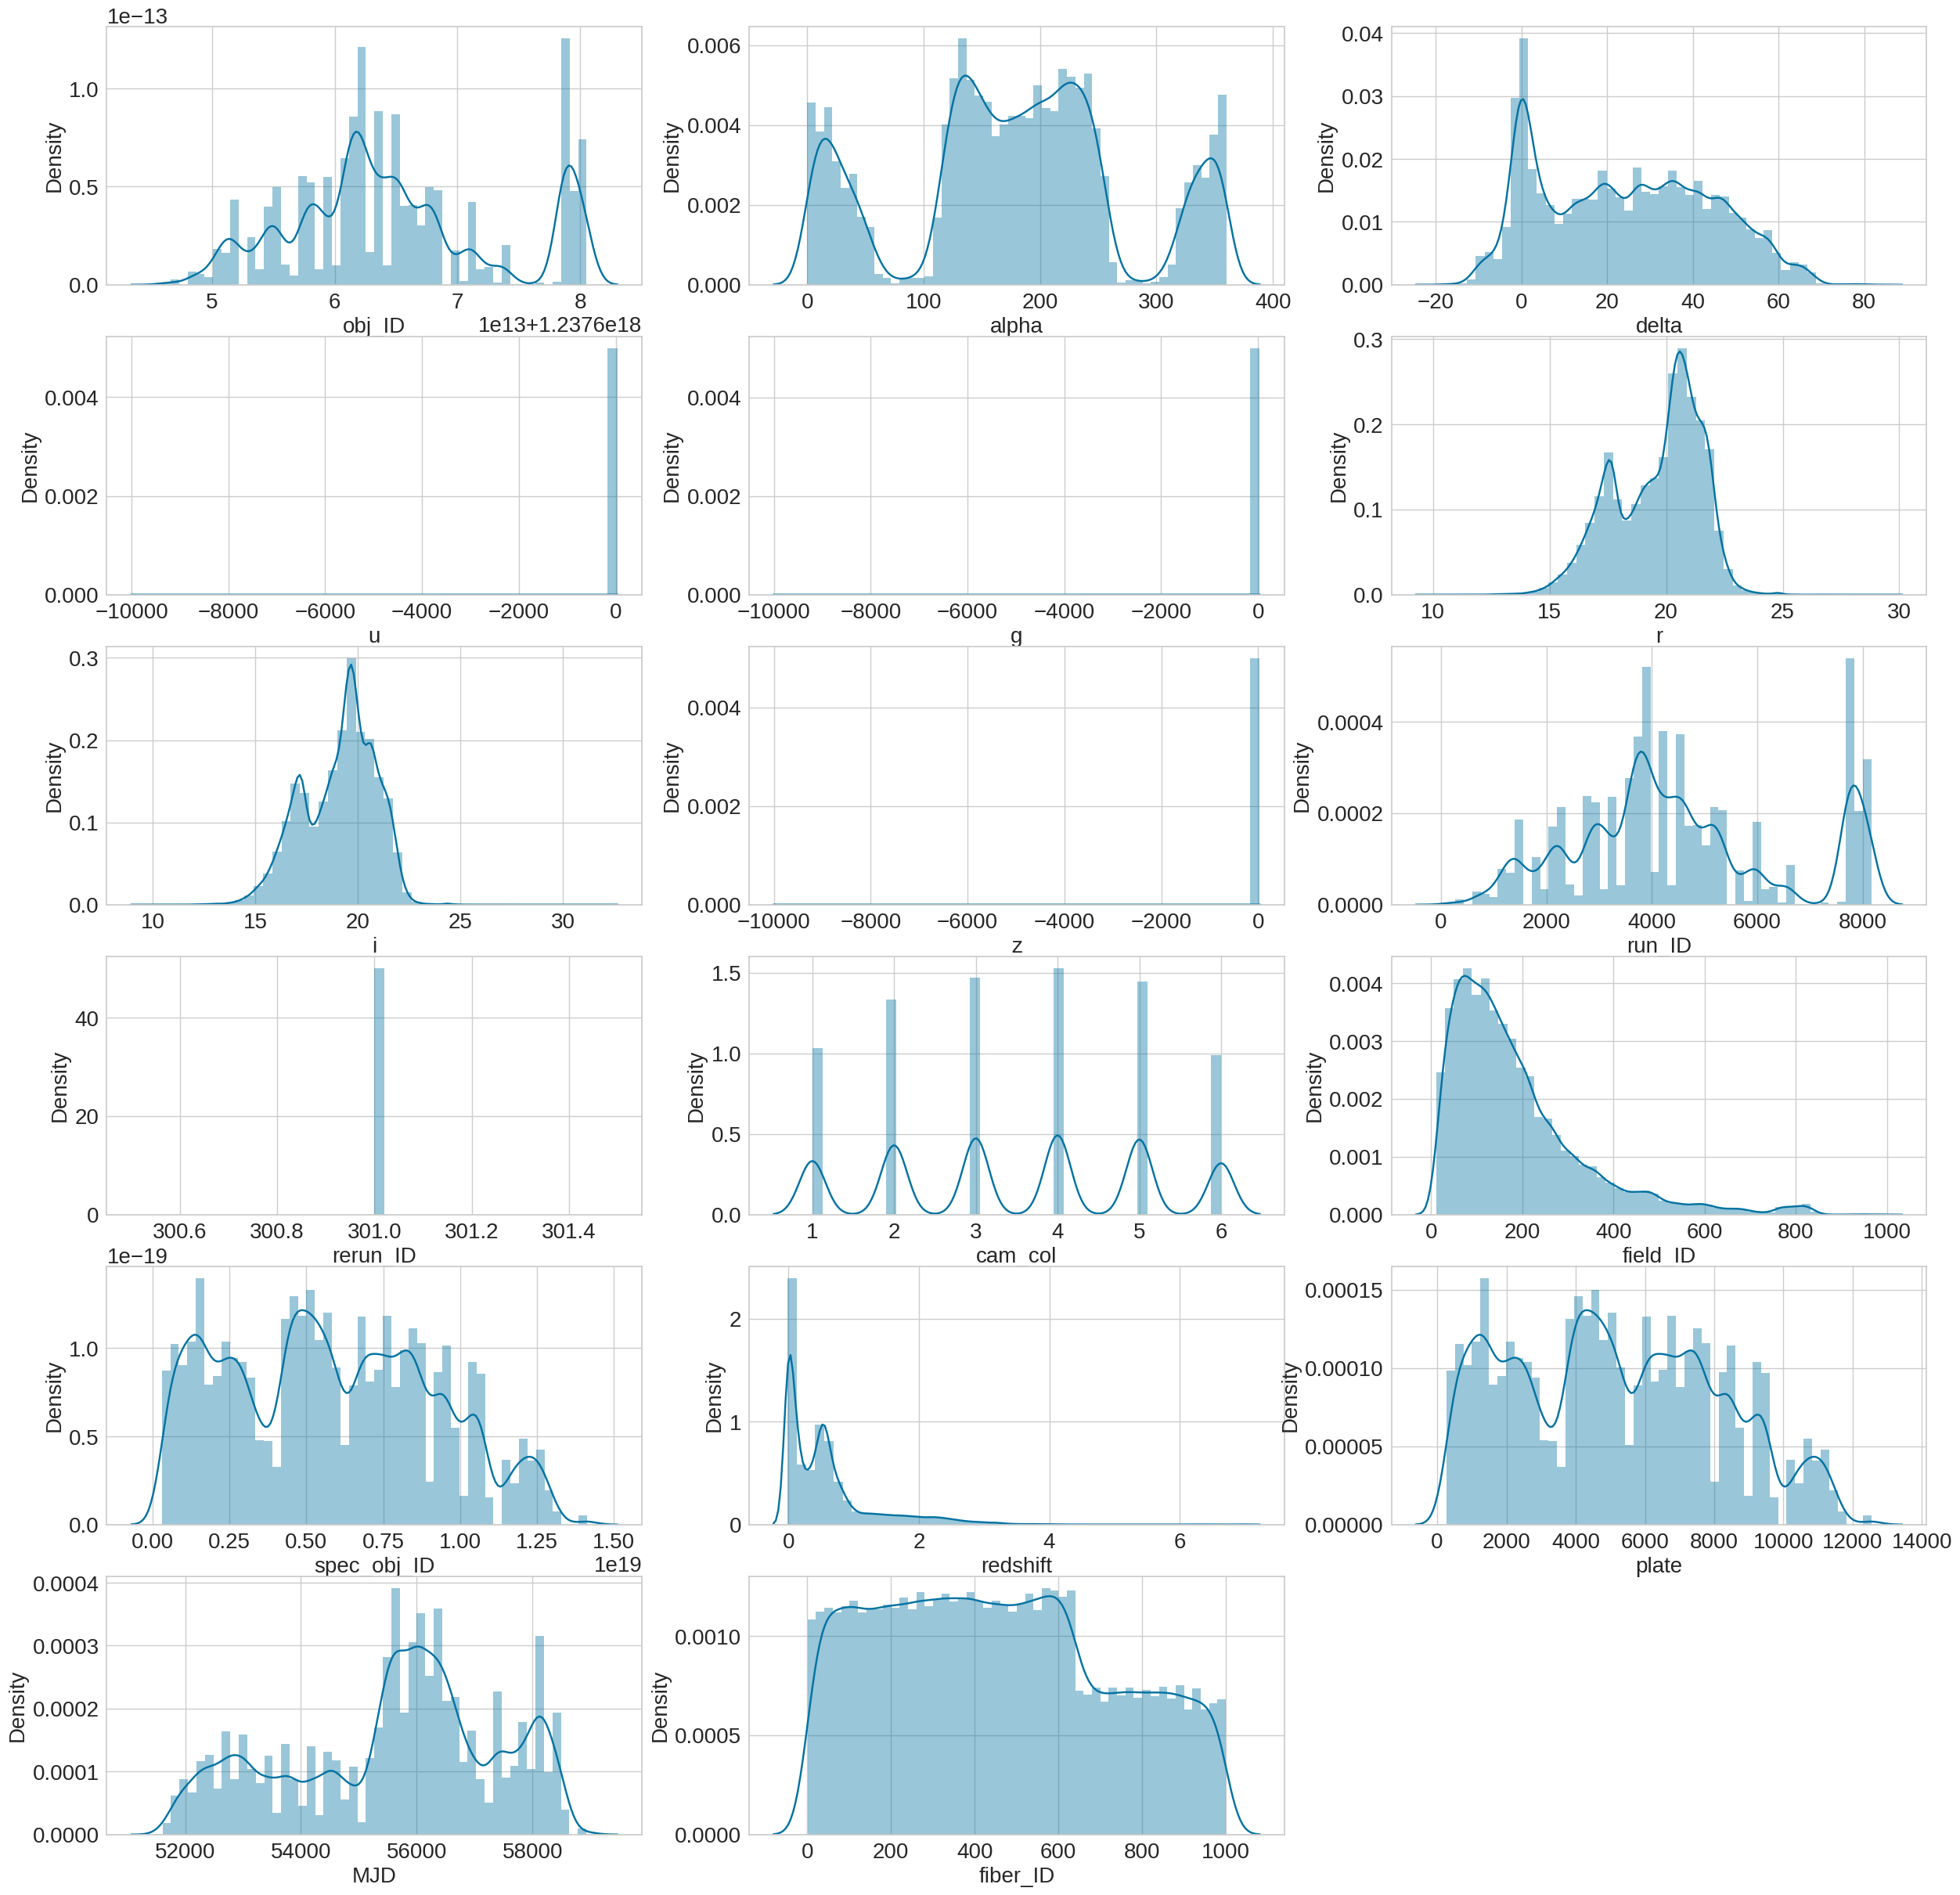

In [21]:
# Distribution of the data using Seaborn
def check_distribution(df):
  plt.figure(figsize=(30,30), facecolor='white') 
  plotnumber = 1

  # Display subplots within main plot of the data.
  for column in df.columns:
      if plotnumber<=18 :
          ax = plt.subplot(6,3,plotnumber)
          sns.distplot(df[column])
          plt.xlabel(column,fontsize=20)
      plotnumber+=1
  plt.show()

check_distribution(stellar_df_disp_x)

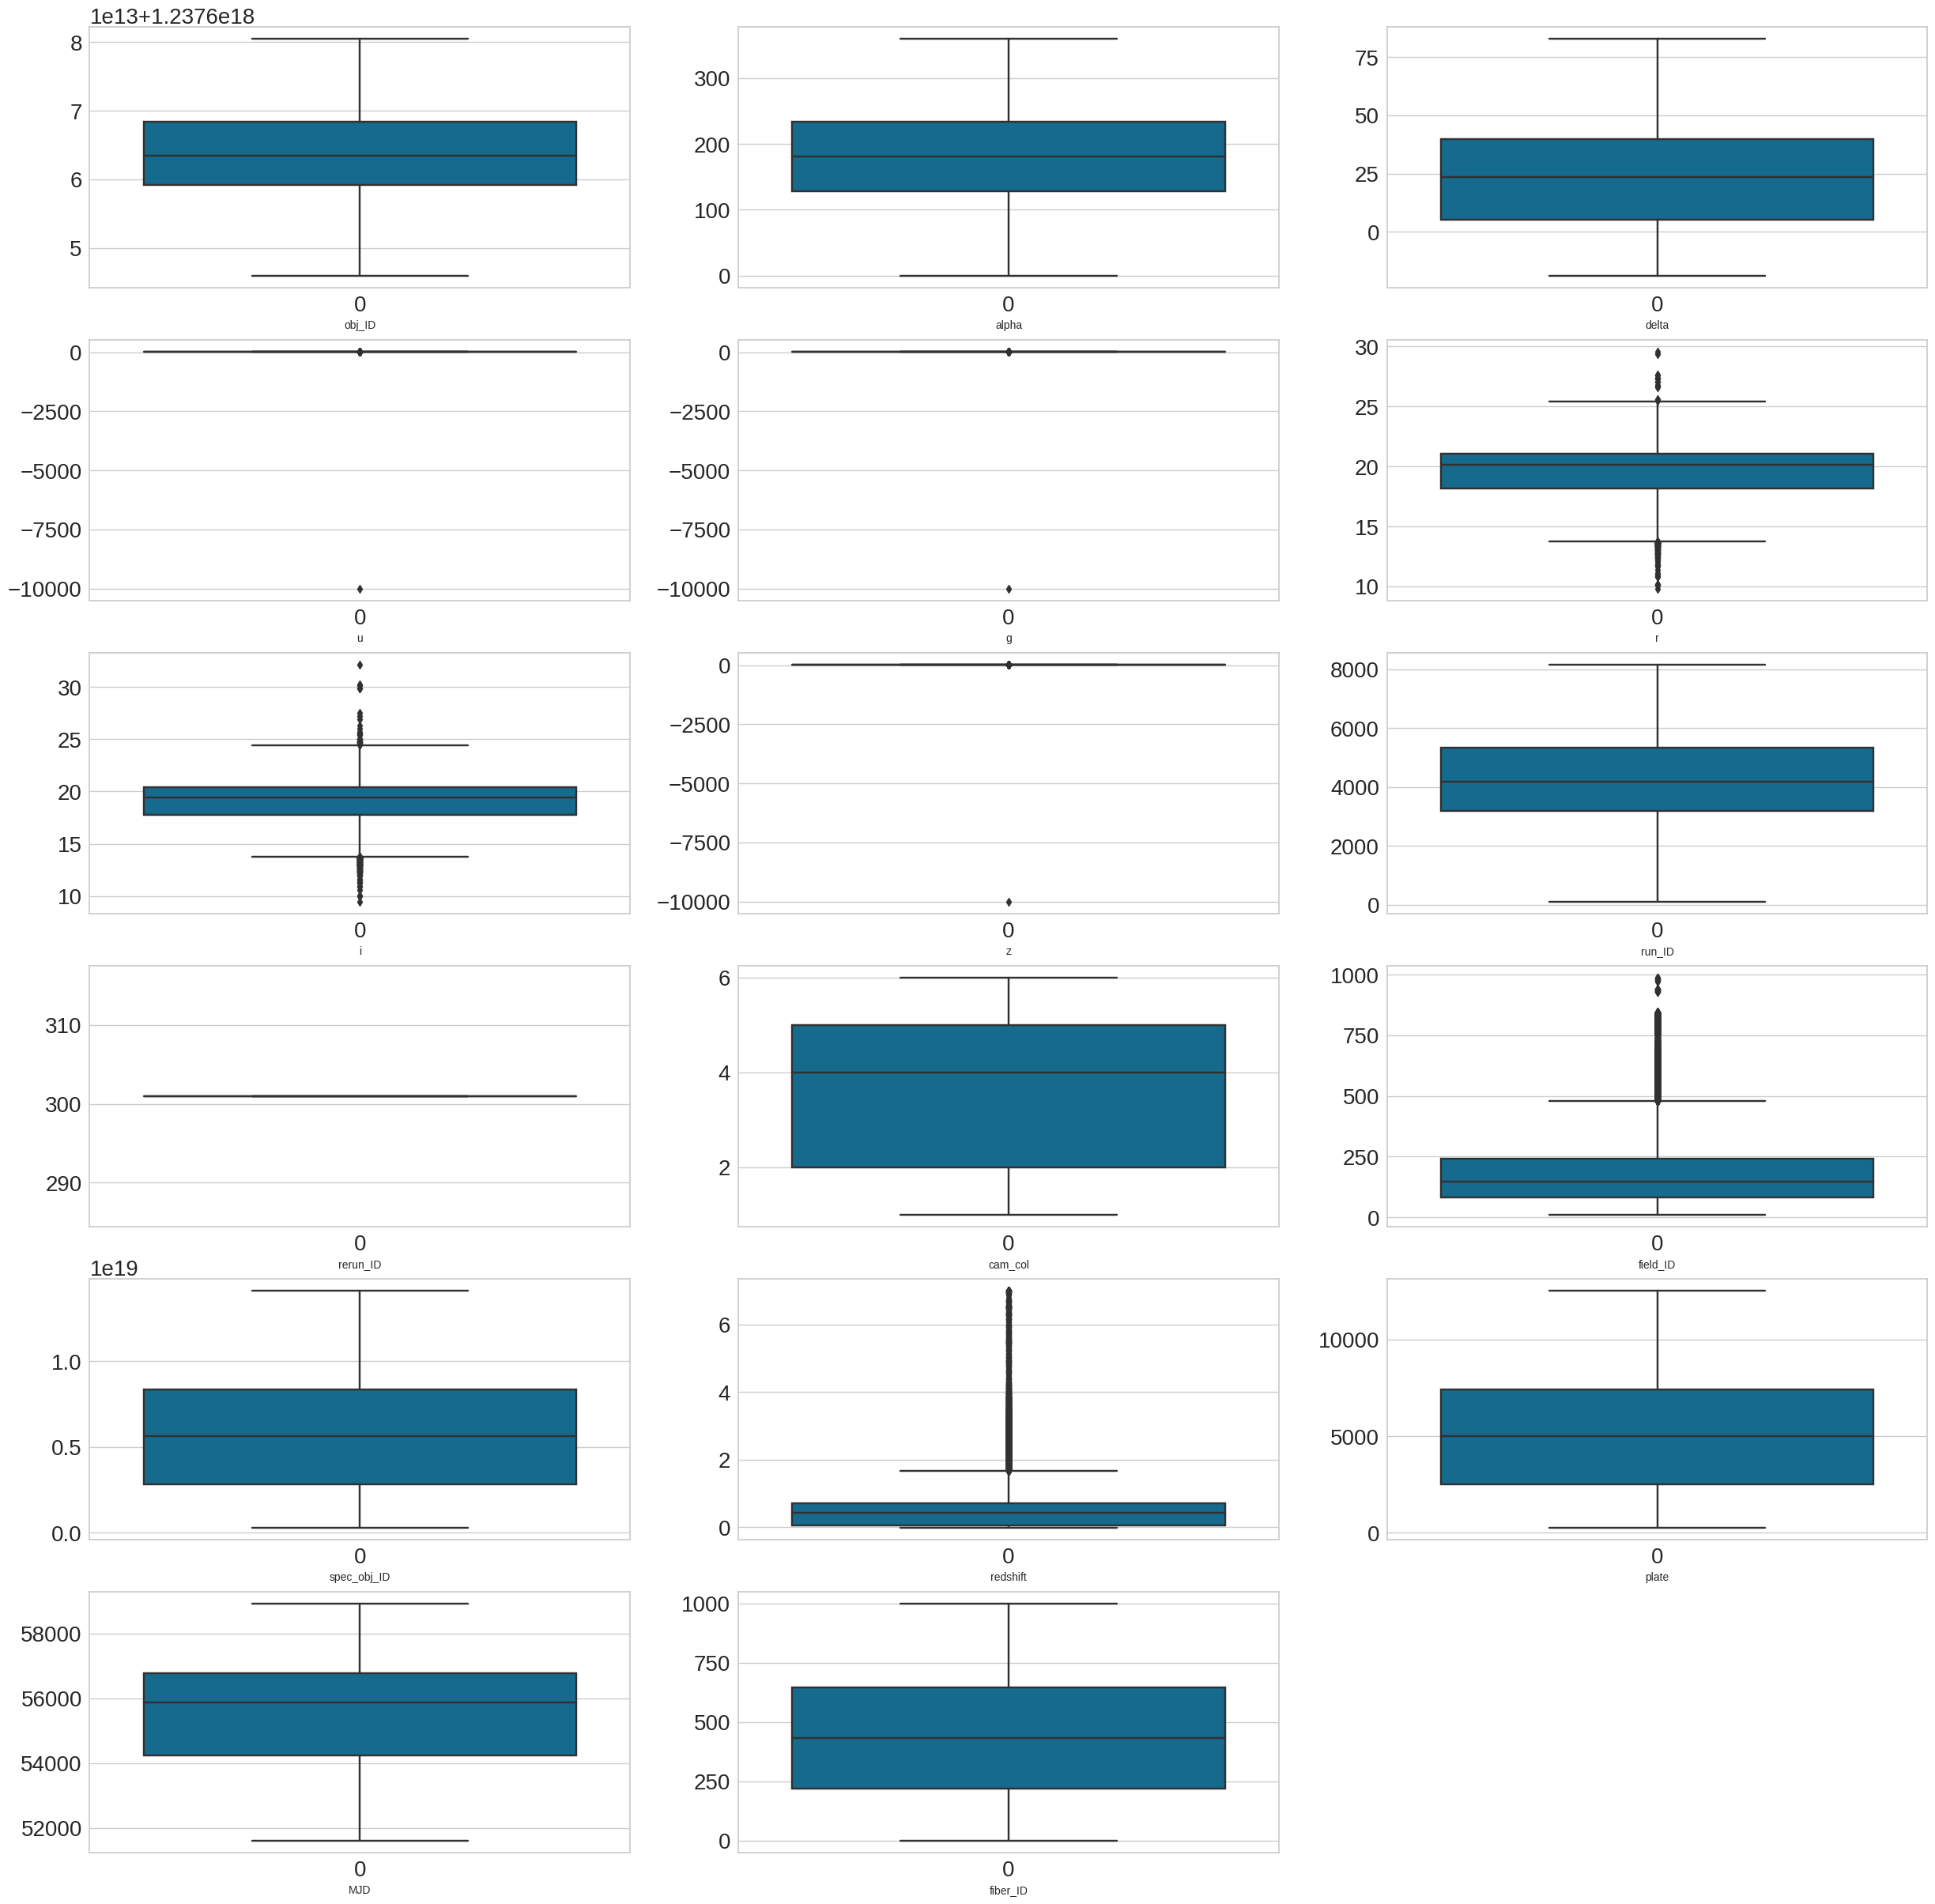

In [19]:
# Check outliers - above and this can be made into one function...
def check_outliers(df):
  plt.figure(figsize=(30,30),facecolor='white')
  plotnumber = 1

  for column in df.columns:
      ax = plt.subplot(6,3,plotnumber)
      sns.boxplot((df[column]))
      plt.xlabel(column,fontsize=10)
      plotnumber+=1
  plt.show()

check_outliers(stellar_df_disp_x)

<Axes: >

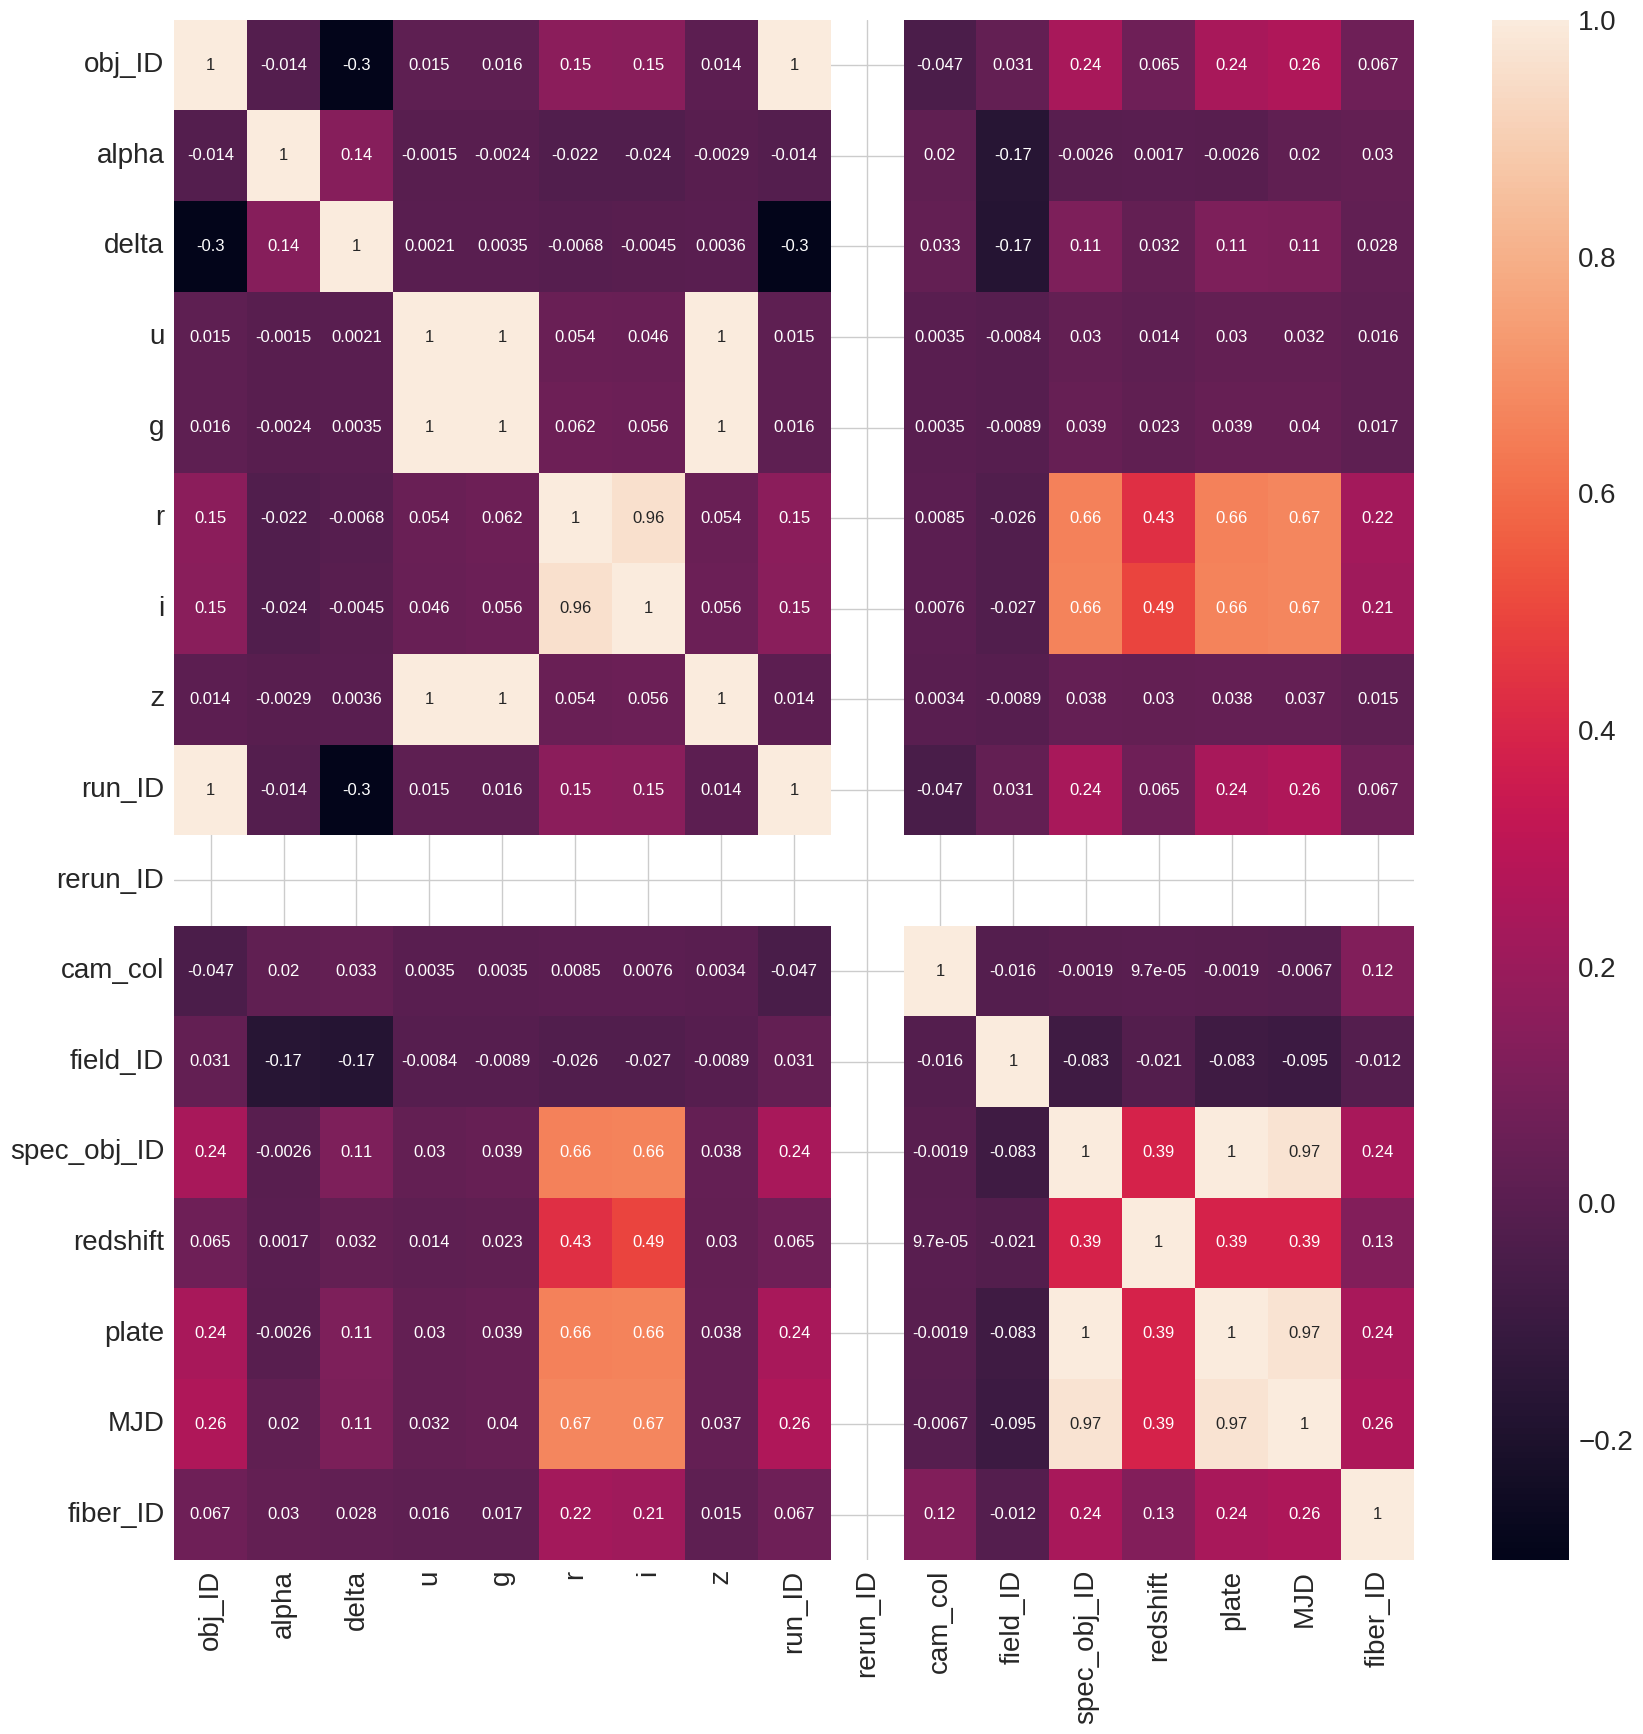

In [23]:
# Collinearity check
fig = plt.figure(figsize=(20,20))
sns.heatmap(stellar_df_disp_x.corr(),annot=True)

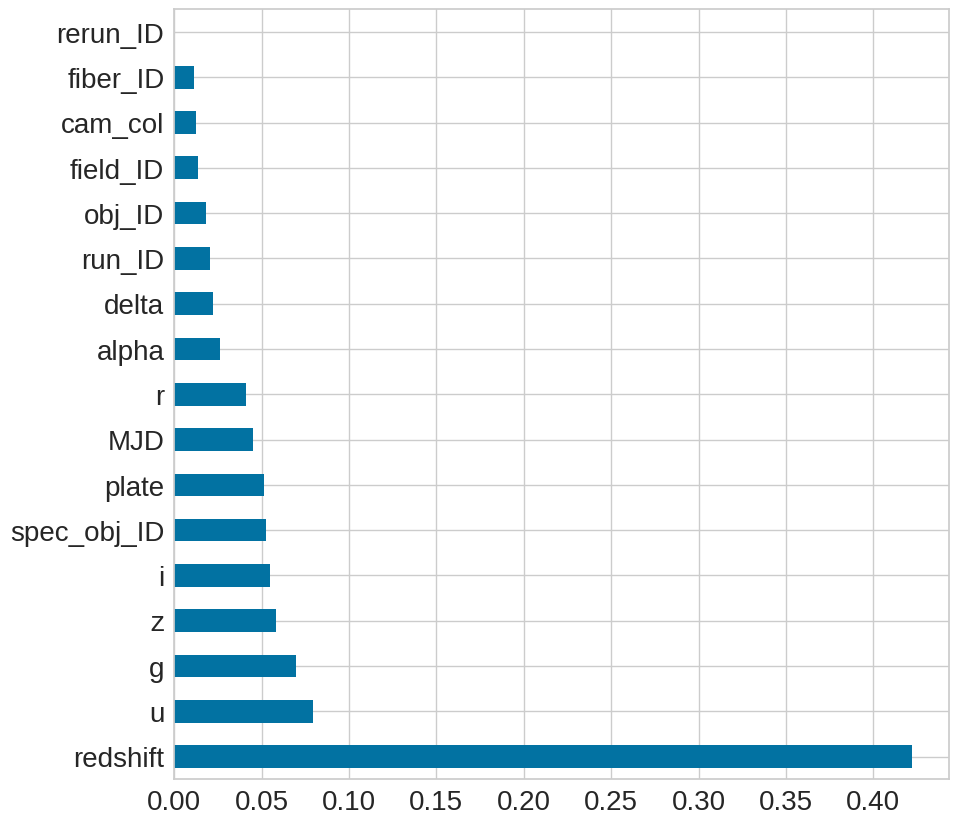

In [29]:
# Feature importance - extraTrees.
model=ExtraTreesClassifier()
model.fit(stellar_df_disp_x, stellar_df_disp_y)

ranked_features = pd.Series(model.feature_importances_,index=stellar_df_disp_x.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [37]:
print(len(stellar_df_disp_x['rerun_ID'].unique()))
print(len(stellar_df_disp_x['spec_obj_ID'].unique()))

1
100000


*Feature 'rerun_ID' has just one unique value and 'spec_obj_ID' has distinct values for each record, both of which will not contribute to explain the variance in the target variable, hence these two columns are dropped.
There is also a high correlation between column **'z' and 'u' and 'g', and 'r' with column 'i' , hence columns 'z' and 'r'** are dropped*

In [38]:
stellar_df_disp_x = stellar_df_disp_x.drop(['rerun_ID', 'spec_obj_ID', 'z', 'r'], axis=1)
stellar_df_disp_x

,obj_ID,alpha,delta,u,g,i,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,19.16573,3606,2,79,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,21.16812,4518,5,119,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,19.34857,3606,2,120,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,20.50454,4192,3,214,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,15.97711,8102,3,137,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.30548,7778,2,581,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,19.75759,7917,1,289,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,17.69034,5314,4,308,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.07254,3650,4,131,0.455040,6751,56368,470


In [39]:
# Print shapes
print(stellar_df_disp_x.shape, stellar_df_disp_y.shape)

(100000, 13) (100000,)


#### **DATA TARGET IMBALLANCE**

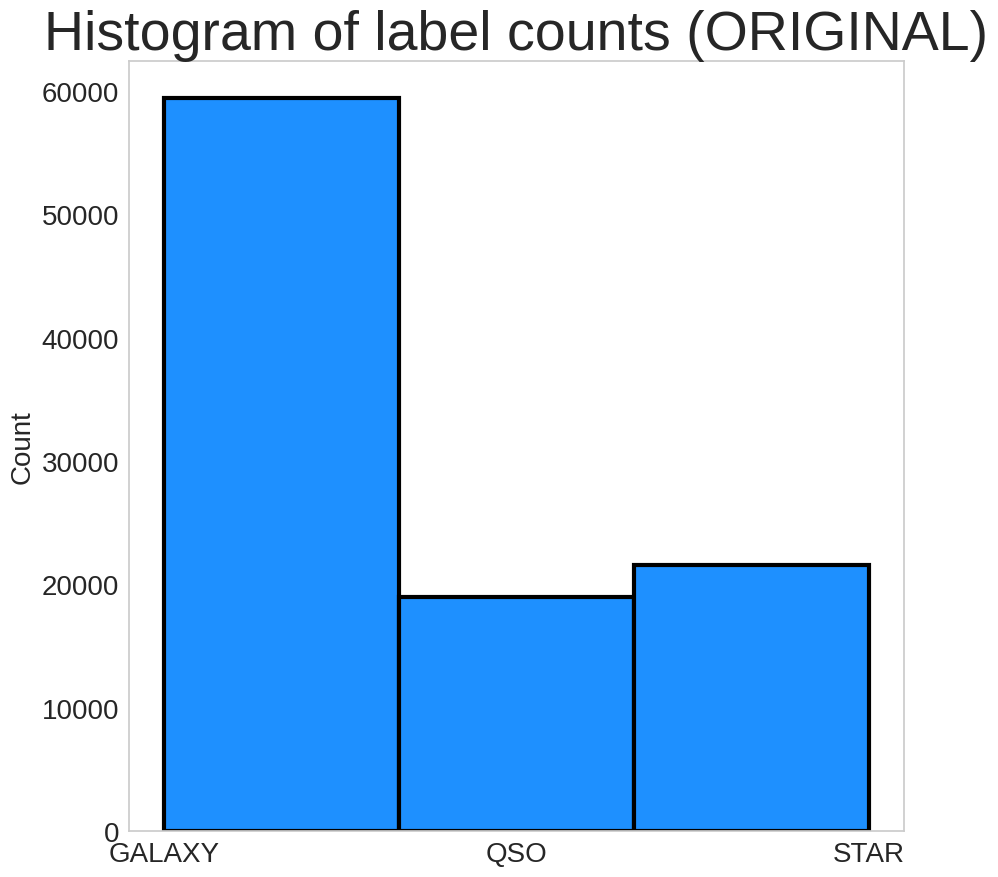

In [45]:
# Confirming that the data is rather skewed
plt.hist(stellar_df_disp_y, bins = 3, color='dodgerblue', edgecolor='black', linewidth=3 )
plt.grid(False)
plt.title("Histogram of label counts (ORIGINAL)",fontsize = 40)
plt.ylabel("Count")
plt.show()

*Our preprocessing showed us our data is very skewed, with the Galaxy class containing most of the values. We will need to correct this, as a biased training dataset might skew the redictions of the models we use further down.*

Given the above there are multiple ways to tackle this issue. 

1. Oversampling data to reduce the bias

2. cuttring out the data randomly to fit the distribution more equally.

**Both are to be tested**

###### **1 - Oversampling**

Oversampling will level out the target distribution, however may cause problems due to syntetically making up over 30K entires, so some of it will technically be made up and may possibly skew the data.

Counter({'GALAXY': 59445, 'QSO': 59445, 'STAR': 59445})


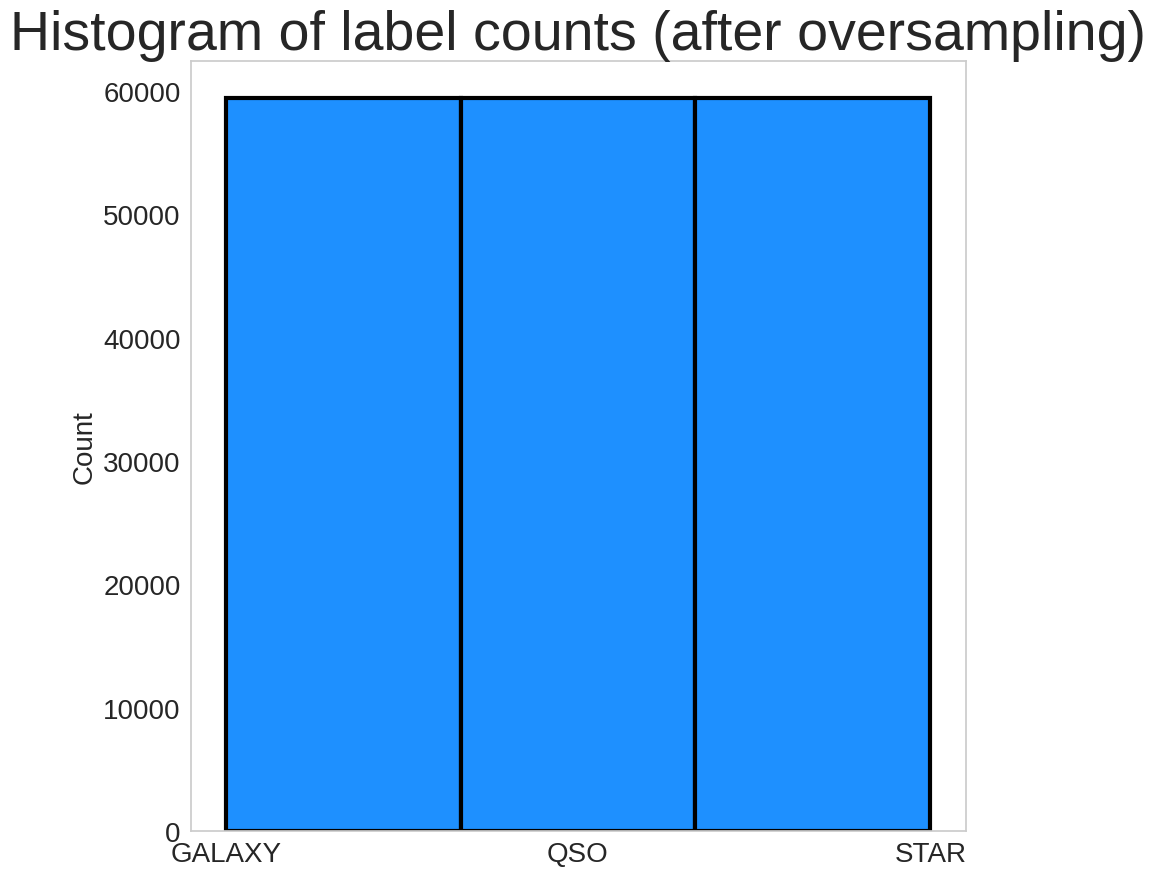

In [46]:
# Transform the dataset
oversample = SMOTE()

# Apply fit resample
stellar_df_disp_x, stellar_df_disp_y = oversample.fit_resample(stellar_df_disp_x, stellar_df_disp_y)

# Summarize the new class distribution
counter = Counter(stellar_df_disp_y)
print(counter)

standard = preprocessing.scale(stellar_df_disp_x)

plt.hist(stellar_df_disp_y, bins = 3, color='dodgerblue', edgecolor='black', linewidth=3 )
plt.grid(False)
plt.title("Histogram of label counts (after oversampling)",fontsize = 40)
plt.ylabel("Count")
plt.show()

In [47]:
# Show new shape content after oversampling
print(stellar_df_disp_x.shape, stellar_df_disp_y.shape)

(178335, 17) (178335,)


In [48]:
stellar_df_disp_x.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842


###### **2 - Dropping randomly**

###### **Final ready for feature engineering df**

## **FEATURE ENGINEERING**

Only real feature engineering that may need to be done are:

1. class_encoding
2. scalar / pca

In [50]:
# Input: input field from dataset of type of stellar
# Output: return value encoding for the type
def stellar_class_encoding(df):
    if df['class'] == 'GALAXY':
        return 0
    elif df['class'] == 'STAR':
        return 1
    else:
        return 2 

In [ ]:
# Apply to the data set
stellar['class'] = stellar.apply(stellar_class_encoding)
stellar

## **MACHINE LEARNING**

#### **OVERALL MODELS PREP**

HERE I HAVE MADE A COUPLE FUNCTIONS FOR AUTEMATION AND OVERALL CLEANER CODE. NEEDS A BIT MORE OF A TIDY UP BUT WILL DO THE JOB FOR NOW

In [52]:
# Check the input model
def check_model_type(model_type):
    # Check valid model type
    valid_models = ["DecisionTree", "RandomForest", "LogisticRegression", "XGBoost", "ExtraTrees", "SVM"]
    if model_type not in valid_models:
        raise ValueError("Invalid model type - TRY AGAIN\n - TRY -> [DecisionTree, RandomForest, LogisticRegression, XGBoost, ExtraTrees, SVM]")

In [57]:
def return_optimal_model_parameters(grid_search, model_type):

    # Get output gridsearch best estimator
    model_output = grid_search.best_estimator_

    # Conditional if to see which model it is to give parameters.
    if model_type == 'LogisticRegression':
        # Print relevant information for LR
        print(f'feature importance: \n {grid_search.best_estimator_.coef_[0]}')

        # Return
        return model_output, model_output.feature_importances_
    
    elif model_type == 'SVM':
        # Print relevant information for SVM
        print(f'b => {grid_search.best_estimator_.intercept_}')
        print(f'Indices of support vectors => {grid_search.best_estimator_.support_}')
        print(f'Support vectors => {grid_search.best_estimator_.support_vectors_}')
        print(f'Number of support vectors for each class => {grid_search.best_estimator_.n_support_}')
        print(f'Coefficients of the support vector in the decision function => {np.abs(grid_search.best_estimator_.dual_coef_)}')

        # Return
        return model_output, None
    
    else:
        # Print relevant information for all None parametric
        print(f'feature importance: \n {grid_search.best_estimator_.feature_importances_}')

        # Return
        return model_output, model_output.feature_importances_

In [58]:
def train_model(X_train, y_train, model_type):

    # Bool flags to see which model is used
    svm_linear_bool = False
    svm_poly_bool = False

    # Check input data and target shapes
    if X_train.shape[0] != y_train.shape[0]:
        raise ValueError("Shapes do not match! - TRY AGAIN")

    check_model_type(model_type)

    # Try to see which VALID model is to be used
    try: 

      if model_type == 'DecisionTree':
          model = DecisionTreeClassifier(random_state=10)
          param_grid = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

      elif model_type == 'ExtraTrees':
          model = ExtraTreesClassifier()
          param_grid = {
              'n_estimators': [5,10,20,40,60,80,100,120, 150,175, 200],
              'max_depth': [1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16]}

      elif model_type == 'LogisticRegression':
          model = LogisticRegression(random_state=10, max_iter=300)
          param_grid = {'C': [0.1, 0.5, 1, 5, 10, 25, 50, 75, 100]}

      elif model_type == 'RandomForest':
          model = RandomForestClassifier(random_state=10)
          param_grid = {'n_estimators':[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,100,125,150,200],
                        'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20,32,64]}

      elif model_type == 'XGBoost':
          model = xgb.XGBClassifier()
          param_grid = {'n_estimators': [25,50,100,150,200],
                        'max_depth': [2,4,8,16,32],
                        'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.02, 0.03, 0.06, 0.08, 0.15]}
      elif model_type == 'SVM':
          model = SVC()
          param_grid = {
              'probability': [True],
              'C': [0.01, 0.1, 0.5, 1, 5, 10,12,16,20],
              'gamma': [50,40,30,20,10,5,2,1,0.1,0.01,0.001],
              'kernel': ['sigmoid']
          }
      else:
          raise ValueError("Invalid model type - please try again with the following options: \n - LogisticRegression\n - DecisionTree\n - RandomForest\n - SVM")
    
    except ValueError as e:
      return e

    ## Initialise and declare GridsearchCV and fit accordingly
    grid_search = GridSearchCV(model, param_grid, cv=10)
    grid_search.fit(X_train, y_train.values.ravel())   

    print(f'BEST PARAMS {grid_search.best_params_}\n')

    # Figure out to save the model in files, much cleaner, do thesame for images.

    # Get model best parameters from grid search 
    model_output, feature_importance = return_optimal_model_parameters(grid_search, model_type)

    # # Display the cross-val
    # cross_validation_evaluation_visualisation(model_output, X_train, y_train, model_type)

    return model_output, feature_importance
        

In [61]:
def cross_validation_evaluation_visualisation(X_train, y_train, model_type, model, n_kfolds=10):

  results = []

  print(f"Evaluating {model} by Kfold cross validation of {n_kfolds}")

  kfold = StratifiedKFold(n_splits = int(n_kfolds))
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)

  print(f"{model_type}, {cv_results.mean()}, {cv_results.std()}")

  pyplot.boxplot(results, labels=model_type)
  pyplot.ylabel("Accuracy")
  pyplot.title('10-fold cross-validation on STELLAR dataset (AUC)')
  pyplot.grid(False)
  pyplot.show()


In [66]:
def train_evaluate(X_train, y_train, model, model_type):

  # threshold_return = 0
  # accuracy_output = 0
  # precision_output = 0
  # recall_output = 0
  # f1_output = 0
  confusion_output = None
  # prediction = 0
  # proba = 0
  data_arr =[]

  print("--- TRAIN PARAMS ---")

  for epoch in range(1,21):
      # print(f'epoch: {epoch}')
      threshold = epoch * 0.05
      proba = model.predict_proba(X)
      prediction = (model.predict_proba(X)[:,1] >= threshold).astype(bool)

      if model_type == 'SVM':
          ## Evaluate the model
          accuracy = accuracy_score(y_train, prediction)
          precision = precision_score(y_train, prediction, average='weighted', labels=np.unique(prediction))
          recall = recall_score(y_train, prediction, average='weighted', labels=np.unique(prediction))
          f1 = f1_score(y_train, prediction, average='weighted', labels=np.unique(prediction))
          confusion = confusion_matrix(y_train, prediction)

          print(f"acc: {accuracy} \n prec: {precision} \n recall: {recall} \n f1: {f1}")

          data_arr += [[threshold, accuracy, precision, recall, f1]]
      else:
          ## Evaluate the model
          accuracy = accuracy_score(y_train, prediction)
          precision = precision_score(y_train, prediction)
          recall = recall_score(y_train, prediction)
          f1 = f1_score(y_train, prediction)
          confusion = confusion_matrix(y_train, prediction)
          data_arr += [[threshold, accuracy, precision, recall, f1]]

          print(f"acc: {accuracy} \n prec: {precision} \n recall: {recall} \n f1: {f1}")

      ## Cant have recall or precision to be 1 as then either completely guessing 1 or 0.
      if recall_output < recall < 0.85 and accuracy > accuracy_output:
          recall_output = recall
          threshold_return = threshold
          accuracy_output = accuracy
          precision_output = precision
          f1_output = f1
          confusion_output = confusion

          print(f"acc: {accuracy} \n prec: {precision} \n recall: {recall} \n f1: {f1}")

  return confusion_output, proba, prediction, threshold_return, data_arr

In [65]:
def test_evaluate(X_test, y_test, model_type, model, threshold_input):

  proba = model.predict_proba(X_test)
  prediction = (model.predict_proba(X_test)[:,1] >= threshold_input).astype(bool)

  print("--- TEST PARAMS ---")

  if model_type == 'SVM':
      # Evaluate the model
      accuracy = accuracy_score(y_test, prediction)
      precision = precision_score(y_test, prediction, average='weighted', labels=np.unique(prediction))
      recall = recall_score(y_test, prediction, average='weighted', labels=np.unique(prediction))
      f1 = f1_score(y_test, prediction, average='weighted', labels=np.unique(prediction))
      confusion = confusion_matrix(y_test, prediction)
      print(f"acc: {accuracy} \n prec: {precision} \n recall: {recall} \n f1: {f1}")

  else:
      # Evaluate the model
      accuracy = accuracy_score(y_test, prediction)
      precision = precision_score(y_test, prediction)
      recall = recall_score(y_test, prediction)
      f1 = f1_score(y_test, prediction)
      confusion = confusion_matrix(y_test, prediction)
      print(f"acc: {accuracy} \n prec: {precision} \n recall: {recall} \n f1: {f1}")

  ## Return
  return confusion, proba, prediction

In [ ]:
def show_eval_performance(data, fe=None):
    id_vis = []
    accuracy_vis = []
    precision_vis = []
    recall_vis = []
    f1_vis = []

    print(data)

    for i in data:
        id_vis += [i[0]]
        accuracy_vis += [i[1]]
        precision_vis += [i[2]]
        recall_vis += [i[3]]
        f1_vis += [i[4]]

    data_vis_df = pd.DataFrame({
        'id':id_vis,
        'acc':accuracy_vis,
        'prec':precision_vis,
        'recall':recall_vis,
        'f1':f1_vis,
    })

    # plot lines
    plt.figure(figsize=(15,10))
    plt.plot(id_vis, accuracy_vis, label = "accuracy")
    plt.plot(id_vis, precision_vis, label = "precision")
    plt.plot(id_vis, recall_vis, label = "recall")
    plt.plot(id_vis, f1_vis, label = "f1 values")
    plt.xlabel('Threshold')
    plt.ylabel('Metrics')
    plt.legend()
    plt.show()

    if fe is not None:

        small_df = pd.DataFrame({
            'features': features_n_svm1,
            'importance': fe
        })

        small_df = small_df.sort_values('importance', ascending=False)

        plt.figure(figsize=(8,5))
        sns.barplot(
            data=small_df,
            x='features',
            y='importance'
        )
        plt.xlabel('feature')
        plt.ylabel('importance')
        plt.xticks(
            rotation=45,
            horizontalalignment = 'right',
            fontweight = 'light',
            fontsize = 'large'
        )
        plt.title('feature importance')
        plt.show()

    return data_vis_df

#### **Decision Trees**

In [ ]:
# CM variables
cmap = plt.cm.tab20c
lab = ['Yes', 'No']

# Target amd features for dataframe
features = []
target = []

In [ ]:
# OVERALL RUN

stellar_X = stellar_df_disp_x
stellar_y = stellar_df_disp_y

model_type = 'DecisionTree'

# Check the model, see if valid
check_model_type(model_type)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(stellar_X, stellar_y, test_size = 0.3, random_state = 42)

# Training and param optimisation
trained_model, feature_imp = train_model(X_train, y_train, model_type)

# Train evaluation
train_info = train_evaluate(X_train, y_train, model, model_type)
cm_train, thershold_input, data_arr_train = train_info[0], train_info[3], train_info[4]

# Kfold cross validation 
cross_validation_evaluation_visualisation(X_train, y_train, model_type, trained_model)

# Test evaluation
test_info = test_evaluate(X_test, y_test, model_type, trained_model, thershold_input)
cm_test = test_info[0]

In [ ]:
# CM display and overall training progress
print("--- TRAIN CONFUSION MATRIX ---")
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['No', 'Yes'])
disp_cm.plot(cmap=cmap)
plt.show()

print("--- TEST CONFUSION MATRIX ---")
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['No', 'Yes'])
disp_cm.plot(cmap=cmap)
plt.show()

print("--- OVERALL TRAIN EVALUATION ---")
df_disp = show_eval_performance(data_arr_train, feature_imp)
df_disp